# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [ ]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [ ]:
data.shape

(5391, 6)

In [ ]:
data.isna().values.any()

False

In [ ]:
data.duplicated().any()

False

In [ ]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [ ]:
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace("$","")
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace(",","")
data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace("$","")
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace(",","")
data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace("$","")
data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace(",","")
data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [ ]:
data.Release_Date = pd.to_datetime(data.Release_Date)

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [ ]:
print(f"average production budget of the films is {data.USD_Production_Budget.mean()}")

average production budget of the films is 31113737.57837136


In [ ]:
print(f"average worldwide gross revenue of films is {data.USD_Worldwide_Gross.mean()}")

average worldwide gross revenue of films is 88855421.96271564


In [ ]:
print(f"minumum revenue for worldwide is {data.USD_Worldwide_Gross.min()}")
print(f"minumum revenue for domestic gross is {data.USD_Domestic_Gross.min()}")

minumum revenue for worldwide is 0
minumum revenue for domestic gross is 0


In [ ]:
money = data[int(len(data)/4):-1].USD_Production_Budget.mean()
profits = data[int(len(data)/4):-1].USD_Worldwide_Gross.mean() + data[int(len(data)/4):-1].USD_Domestic_Gross.mean()
if money-profits<0:
  print("it is not worth")
else:
  print("it is profitable")


it is not worth


In [ ]:
print(f"The movie that has the highest production budget is {data.Movie_Title.loc[data.USD_Production_Budget.idxmax()]}")
print(f"The movie that has the highest worldwide gross revenue is {data.Movie_Title.loc[data.USD_Production_Budget.idxmin()]}")

The movie that has the highest production budget is Avatar
The movie that has the highest worldwide gross revenue is My Date With Drew


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [ ]:
data[data.USD_Domestic_Gross == 0].count()

Rank                     512
Release_Date             512
Movie_Title              512
USD_Production_Budget    512
USD_Worldwide_Gross      512
USD_Domestic_Gross       512
dtype: int64

In [ ]:
data[data.USD_Domestic_Gross == 0].sort_values(by="USD_Production_Budget",ascending=False)[:15]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [ ]:
data[data.USD_Worldwide_Gross == 0].sort_values(by="USD_Production_Budget", ascending=False)[:15]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5092,1435,2015-12-31,The Crow,40000000,0,0
3300,1631,2008-12-31,Black Water Transit,35000000,0,0
5045,1656,2015-10-30,Freaks of Nature,33000000,0,0


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [ ]:
qq = data.query('(USD_Domestic_Gross == 0) & (USD_Worldwide_Gross != 0)')
qq 

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films

---



**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
scrape_date = pd.to_datetime(scrape_date)
data.Release_Date = pd.to_datetime(data.Release_Date)
not_released_movies = data.loc[data.Release_Date > scrape_date]
not_released_movies

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [ ]:
len(data.loc[(data.USD_Worldwide_Gross == 0) & (data.USD_Domestic_Gross == 0)])

357

In [ ]:
zeros = data.loc[(data.USD_Worldwide_Gross == 0) & (data.USD_Domestic_Gross == 0)]
zeros

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


In [ ]:
data_clean = data.drop(index=not_released_movies.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [ ]:
lose = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
len(lose)/len(data_clean)* 100

37.27711738484398

# Seaborn for Data Viz: Bubble Charts

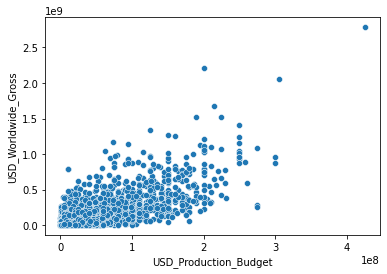

In [ ]:
sns.scatterplot(data=data_clean,x="USD_Production_Budget",y="USD_Worldwide_Gross")

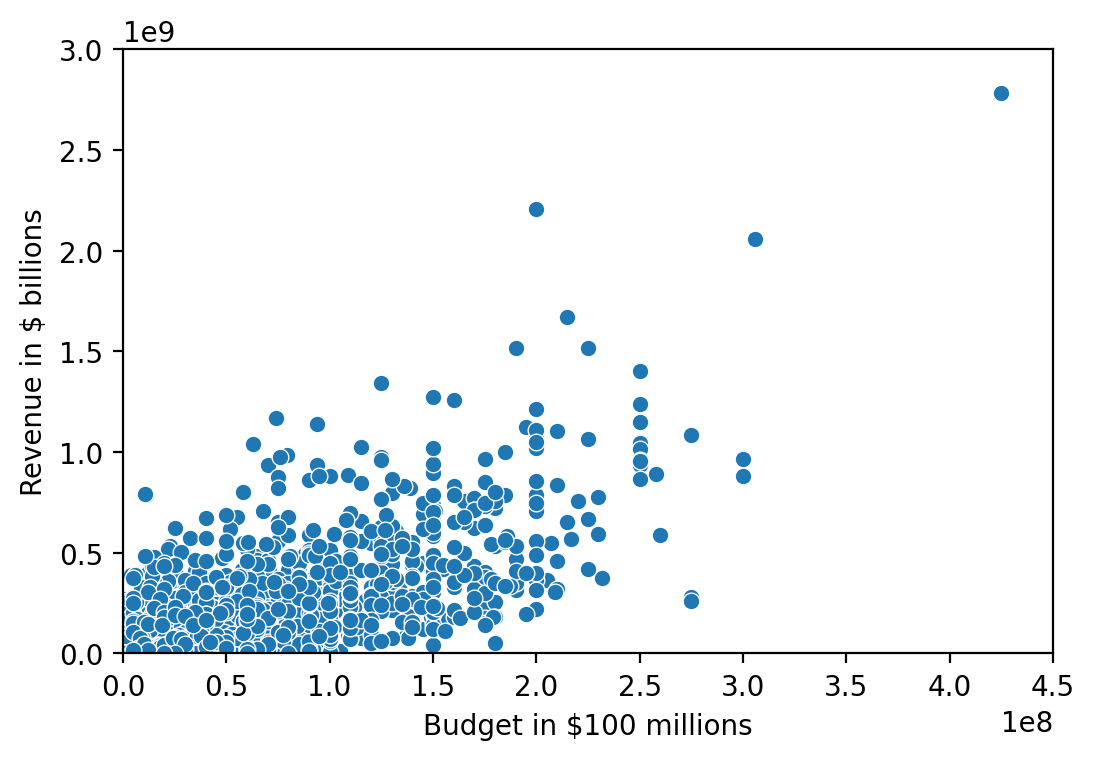

In [ ]:
plt.figure(figsize=(6,4), dpi=200)

my_sns = sns.scatterplot(data=data_clean, x="USD_Production_Budget", y="USD_Worldwide_Gross")
my_sns.set(ylim=(0,3000000000),
       xlim=(0,450000000),
       ylabel="Revenue in $ billions",
       xlabel="Budget in $100 millions")

plt.show()

In [ ]:
data_clean.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

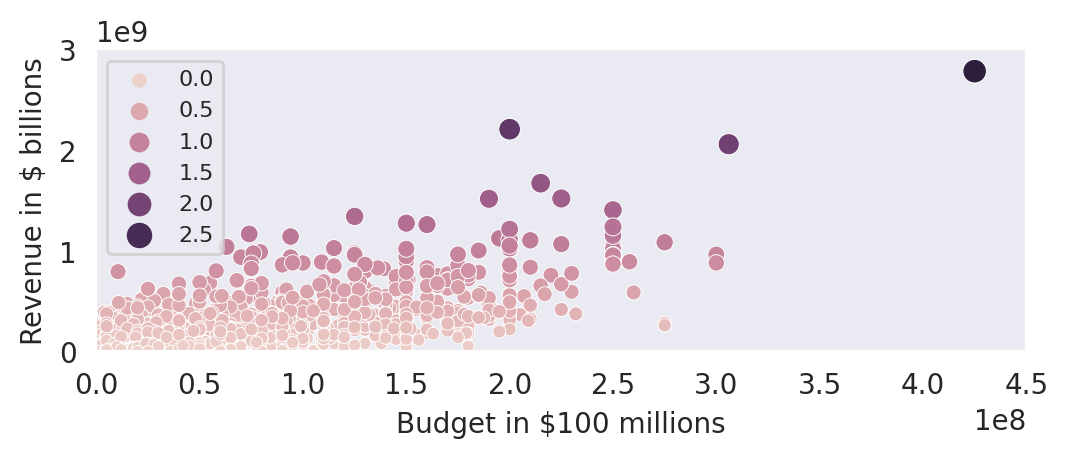

In [ ]:
plt.figure(figsize=(6,2), dpi=200)
sns.set_style("dark")
my_bubble = sns.scatterplot(data=data_clean,
                            x="USD_Production_Budget",
                            y="USD_Worldwide_Gross",
                            hue="USD_Worldwide_Gross", #for color
                            size="USD_Worldwide_Gross")#for size


my_bubble.set(ylim=(0,3000000000),
              xlim=(0,450000000),
              xlabel='Budget in $100 millions',
              ylabel='Revenue in $ billions')

my_bubble.legend(fontsize=8) #to arrange legend(little) table size

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

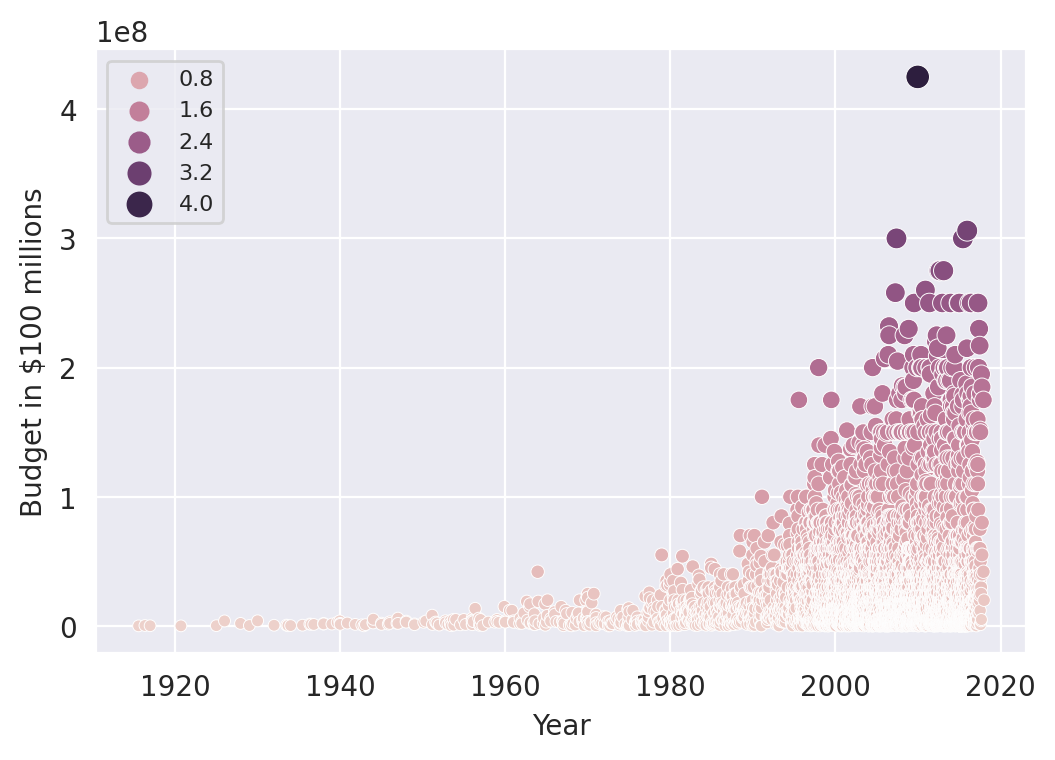

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(6,4),dpi=200)

sns_bubble = sns.scatterplot(data=data_clean, x="Release_Date", y="USD_Production_Budget",
                             hue="USD_Production_Budget", size="USD_Production_Budget")
sns_bubble.set(ylabel="Budget in $100 millions", xlabel="Year")

sns_bubble.legend(fontsize=8)



In [ ]:
data_clean["Decade"] = pd.DatetimeIndex(data_clean["Release_Date"]).year // 10*10
data_clean.sort_values(by="Decade",ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0,2010
4154,1439,2012-05-10,Frankenweenie,39000000,81150788,35287788,2010
4156,3658,2012-05-10,Wuthering Heights,8000000,2721534,100915,2010
4157,3910,2012-05-10,Trade of Innocents,5800000,15091,15091,2010
4158,730,2012-05-16,The Dictator,65000000,180148897,59650222,2010
...,...,...,...,...,...,...,...
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [ ]:
old_films = data_clean[data_clean.Decade<1970]
new_films = data_clean[data_clean.Decade>1960]
print(f"There are {len(old_films)} that were released prior to 1970")
old_films.loc[old_films.USD_Production_Budget.idxmax()]

There are 153 that were released prior to 1970


Rank                                    1253
Release_Date             1963-12-06 00:00:00
Movie_Title                        Cleopatra
USD_Production_Budget               42000000
USD_Worldwide_Gross                 71000000
USD_Domestic_Gross                  57000000
Decade                                  1960
Name: 109, dtype: object

# Seaborn Regression Plots

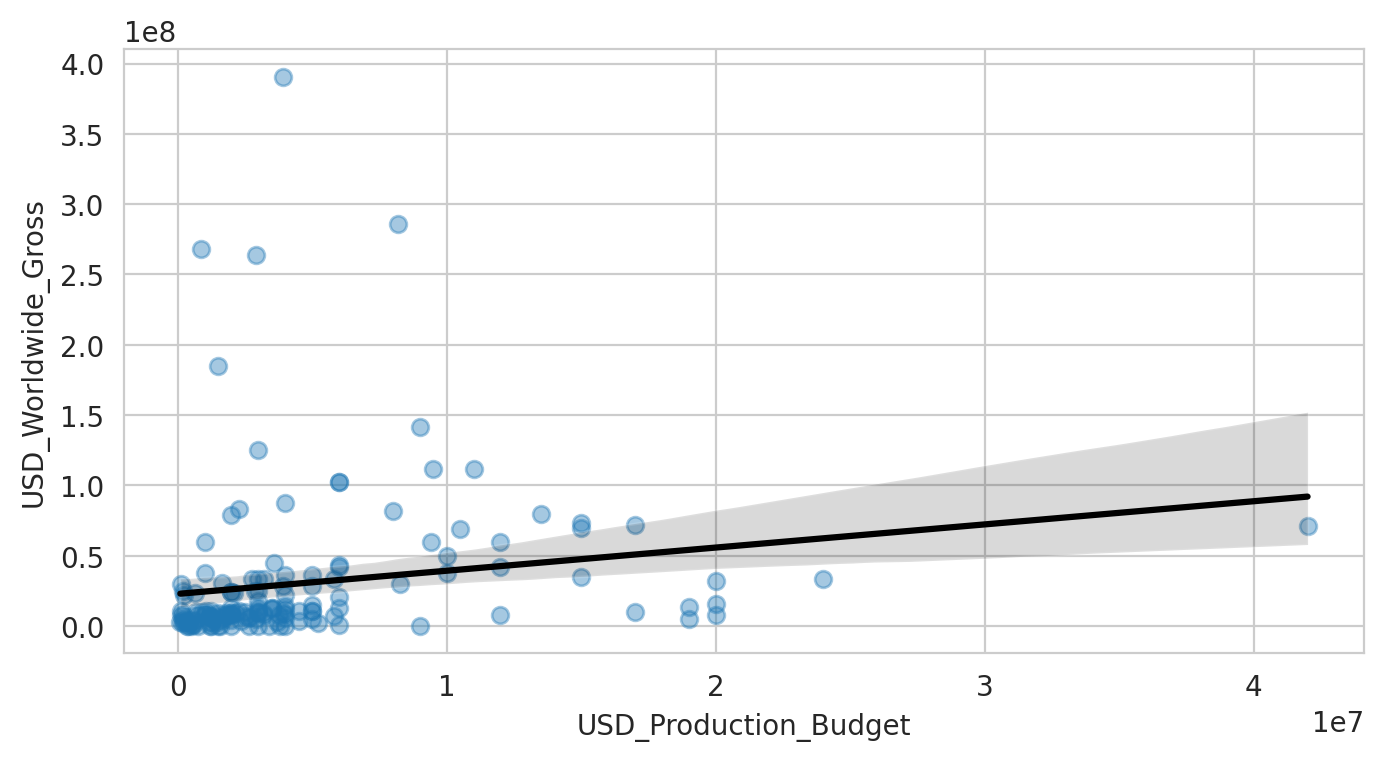

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, x="USD_Production_Budget", y="USD_Worldwide_Gross", scatter_kws={"alpha":0.4}, line_kws={"color":"black"})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

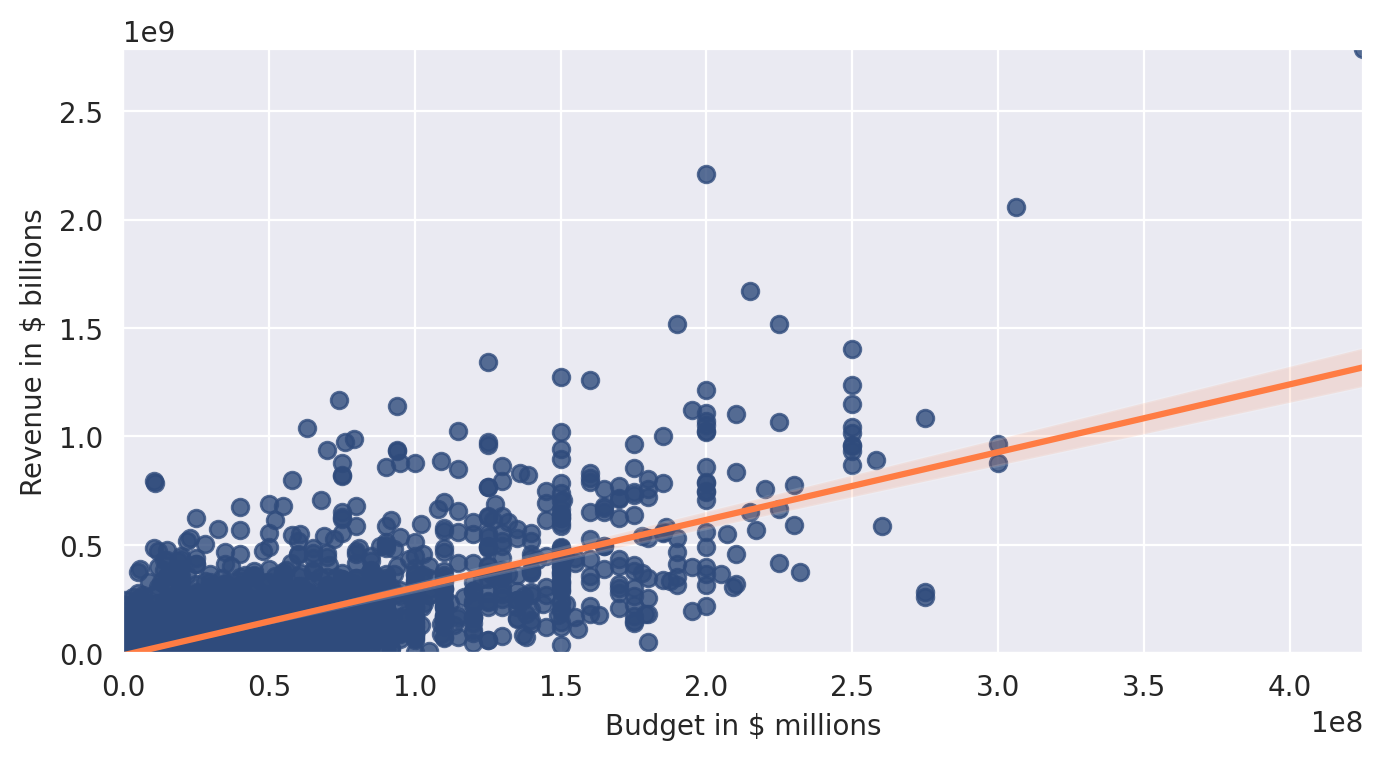

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
  my_sns= sns.regplot(data=new_films, x="USD_Production_Budget",y="USD_Worldwide_Gross",
              scatter_kws={"color":"#2f4b7c"}, line_kws={"color":"#ff7c43"} )

  my_sns.set(xlim=(0, new_films.USD_Production_Budget.max()),
             ylim=(0, new_films.USD_Worldwide_Gross.max()),
             xlabel="Budget in $ millions",
             ylabel="Revenue in $ billions")  

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [ ]:
regression = LinearRegression()

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [ ]:
#explanotory variable or feature
x = pd.DataFrame(new_films, columns=["USD_Production_Budget"])


In [ ]:
#response variable or target

y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [ ]:
#find the best-fit line
regression.fit(x,y)

LinearRegression()

In [ ]:
#theta zero
theta_zero = regression.intercept_

In [ ]:
#theta one
theta_one = regression.coef_

In [ ]:
#R-squared
regression.score(x,y)

0.5577032617720403

In [ ]:
#for old_films

x_old = pd.DataFrame(old_films, columns=["USD_Production_Budget"])
y_old = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])

regression.fit(x_old, y_old)

LinearRegression()

In [ ]:
regression.intercept_

array([22821538.63508039])

In [ ]:
regression.coef_

array([[1.64771314]])

In [ ]:
regression.score(x_old, y_old)

0.02937258620576877

In [ ]:
# a Revenue predicton for $350 million budget 
budget_= 350000
revenue_ = theta_zero[0] + theta_one[0,0] * budget_
round(revenue_, -6)

23000000.0